<a href="https://colab.research.google.com/github/rabbi303/Python_Assignments/blob/main/Class_8_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [150]:
df = pd.read_csv("/content/sample_data/game data.csv")
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [151]:
df= df.drop('Days', axis=1)
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [152]:
x = df.drop('Wear Jacket?', axis=1)
y = df[['Wear Jacket?']]

In [153]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [154]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


In [155]:
from pandas.core.dtypes.common import is_numeric_dtype # import is_numeric_dtype to check numeric or not

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [157]:
# using is_numeric_dtype to check and transform to numeric 
for col in x.columns:
  if is_numeric_dtype(x[col]):
    continue
  x[col] = le.fit_transform(x[col])

In [158]:
x.head(3)  # [Outlook-> Sunny=1, Cloudy=0], [Temprature-> Cold=0, Warm=1], [Routine-> Indoor=0, Outdoor=1]

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1


In [159]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [160]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [161]:
dt.fit(x,y) #training Decision Tree Classifier model

DecisionTreeClassifier()

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

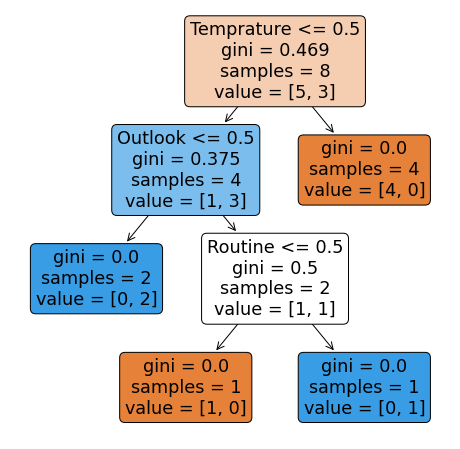

In [162]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
tree.plot_tree(dt, filled= True, rounded=True, feature_names=x.columns)

In [165]:
dt.predict([[0,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [164]:
dt.score(x,y)

1.0